In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #importing necessary libraries

#Data Overview

In [ ]:
train_df = pd.read_csv("train_t.csv") #importing dataset
train_v = train_df.copy() #creating copy of original dataset for visualization purposes

Data description from Kaggle Titanic competition page ([Link](https://www.kaggle.com/competitions/titanic/data)):


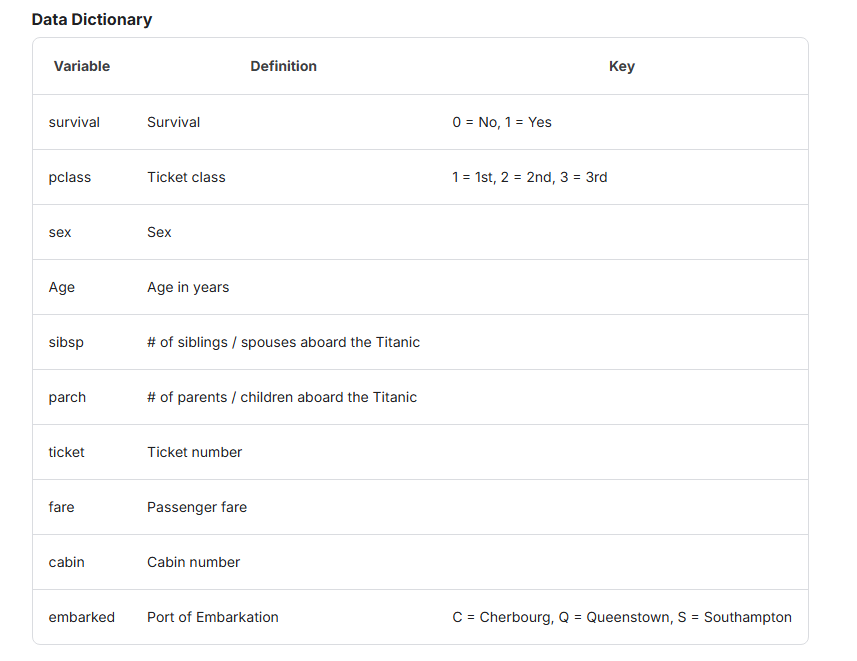

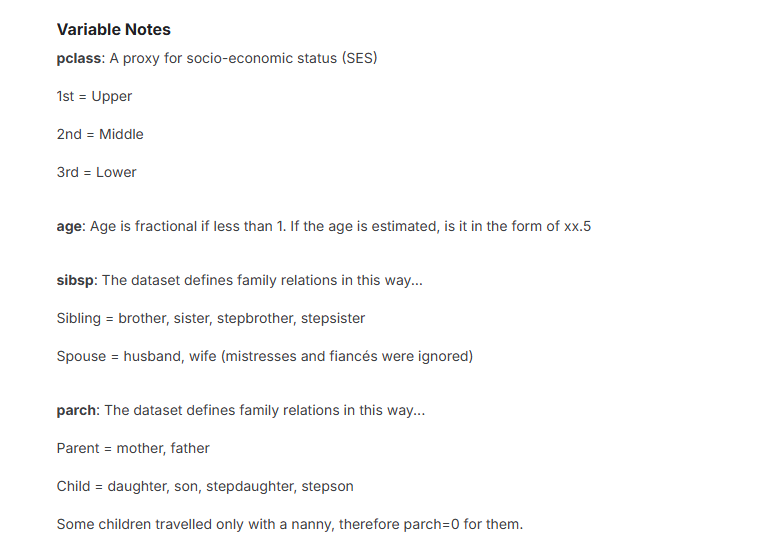

###Quick glance at the data

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info() #there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Graphs

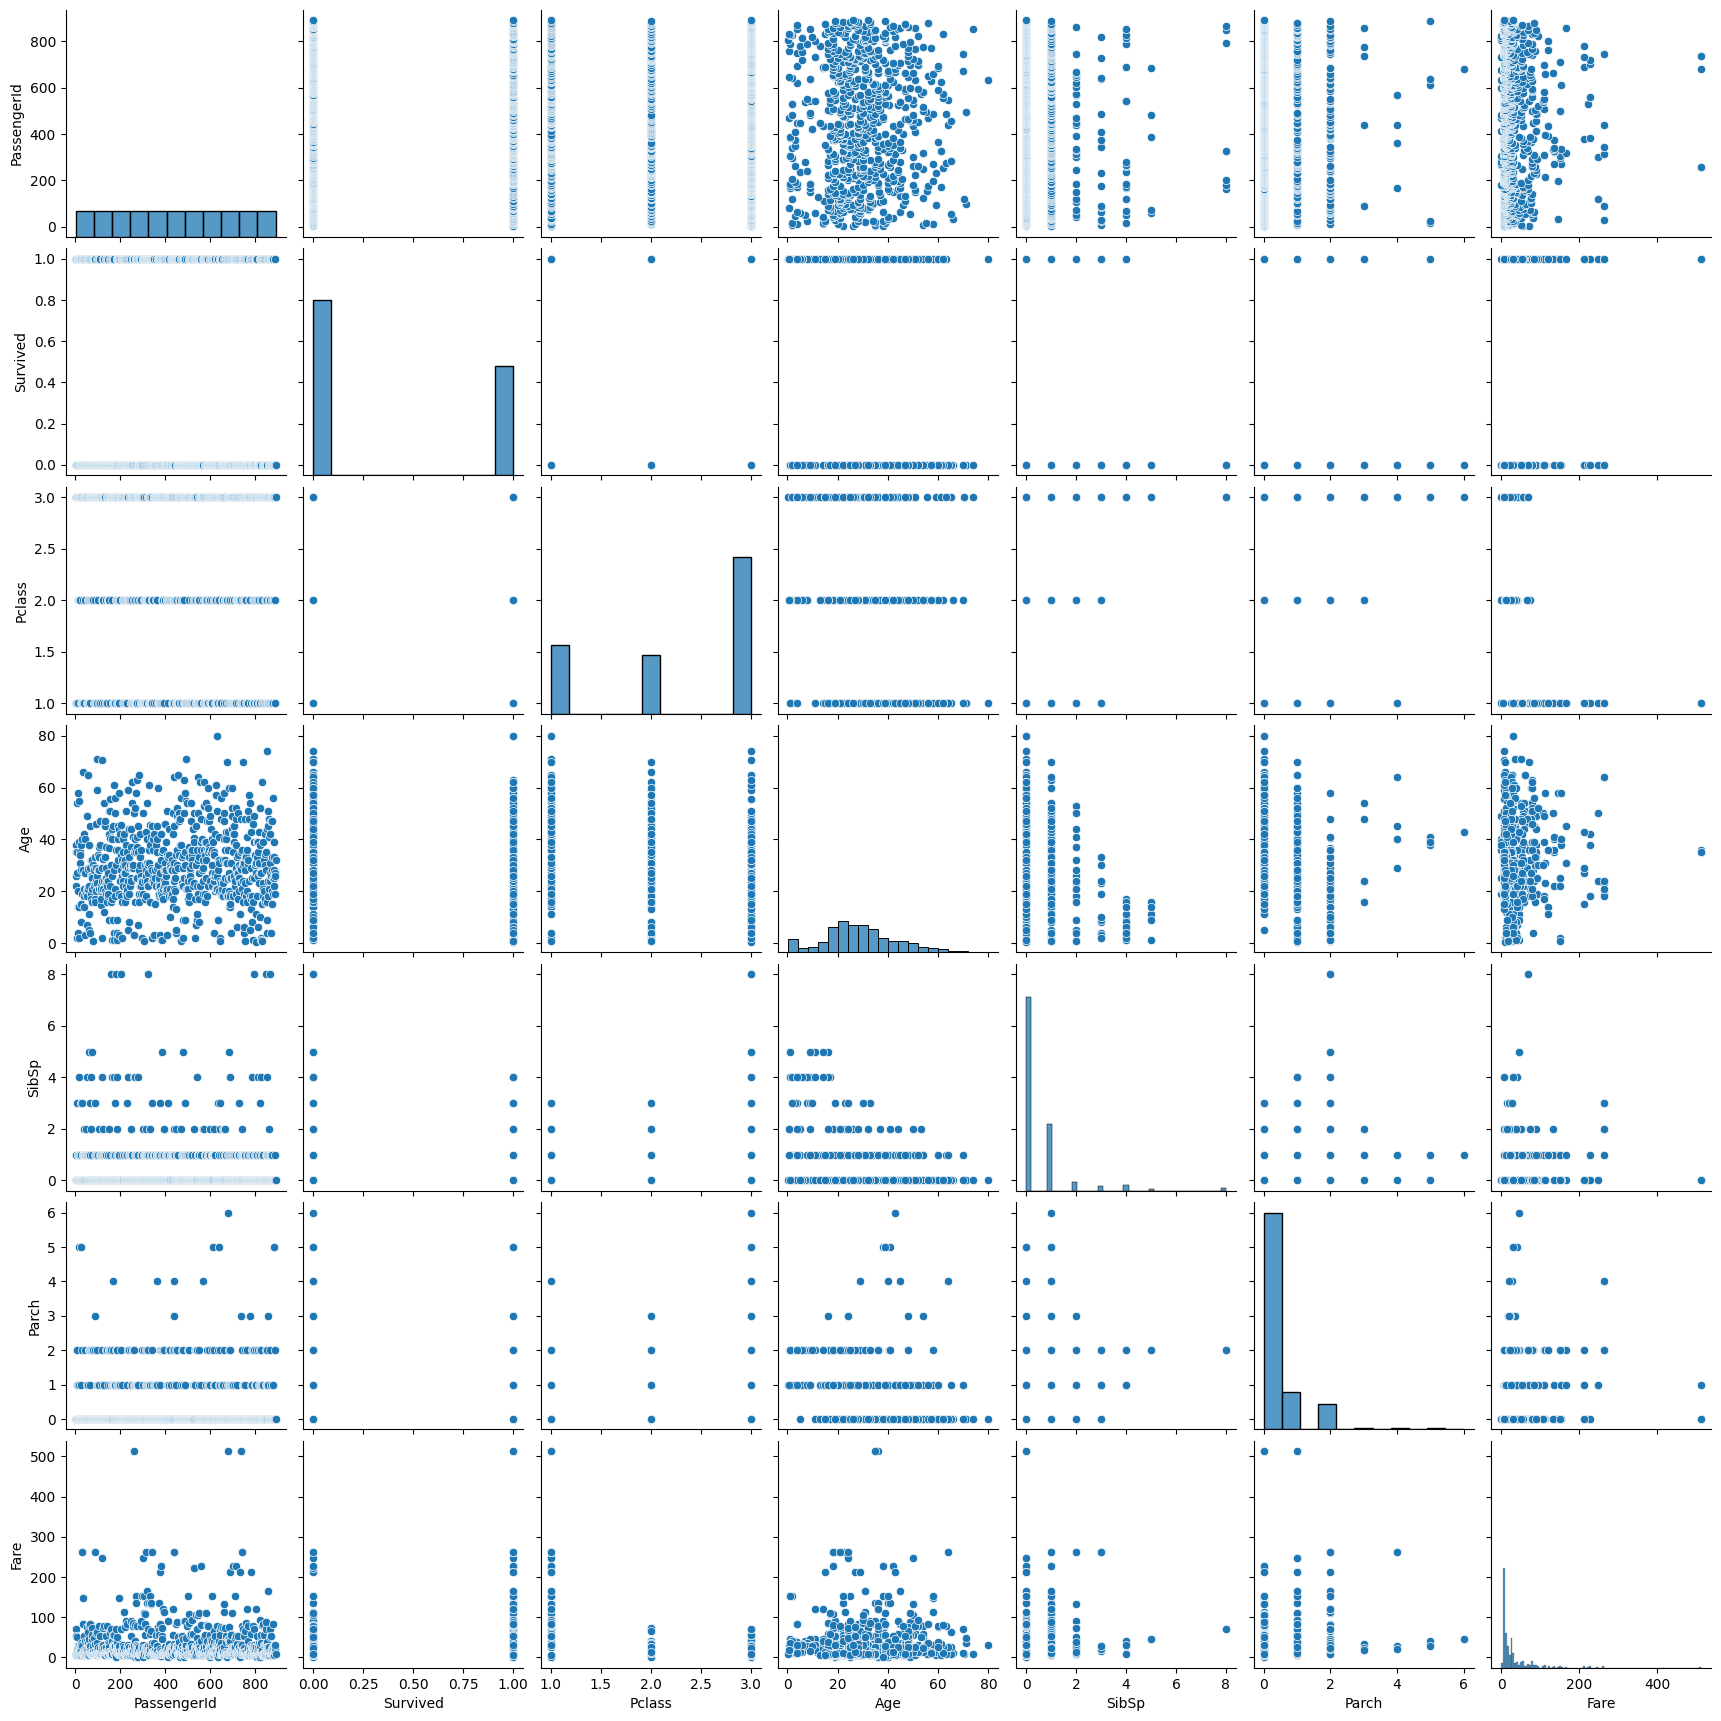

In [ ]:
sns.pairplot(train_df)

Age and fare attributes are skewed right so we will have to transform them

<ipython-input-10-60a33bafffeb>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_v.groupby(["AgeGroup", "Survived"]).size().unstack().plot.bar(ax=axes[1, 0])


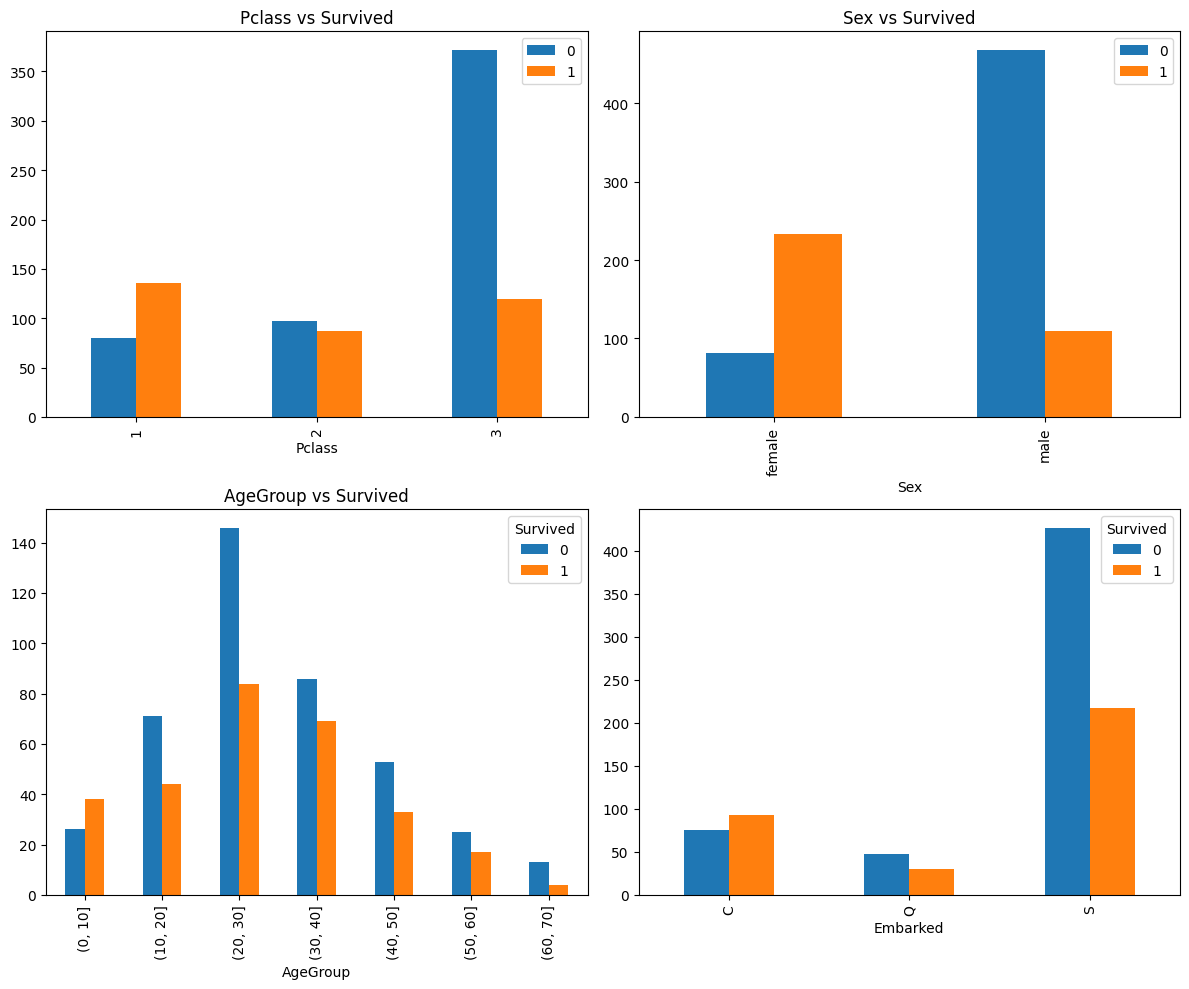

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Subplot 1: Pclass vs Survived
train_df.groupby(["Pclass", "Survived"]).size().unstack().plot.bar(ax=axes[0, 0])
axes[0, 0].legend()
axes[0, 0].set_title("Pclass vs Survived")

# Subplot 2: Sex vs Survived
train_df.groupby(["Sex", "Survived"]).size().unstack().plot.bar(ax=axes[0, 1])
axes[0, 1].legend()
axes[0, 1].set_title("Sex vs Survived")

# Subplot 3: AgeGroup vs Survived
bins = np.arange(0, 80, 10)
train_v["AgeGroup"] = pd.cut(train_v["Age"], bins) # creating additional attribute to plot relation between Age and Survived
train_v.groupby(["AgeGroup", "Survived"]).size().unstack().plot.bar(ax=axes[1, 0])
axes[1, 0].set_title("AgeGroup vs Survived")

#Subplot 4: Embarked vs Survived
train_df.groupby(["Embarked", "Survived"]).size().unstack().plot.bar(ax=axes[1, 1])
axes[0, 1].legend()
axes[0, 1].set_title("Sex vs Survived")
plt.tight_layout()
plt.show()

From graphs above we can clearly observe that children and women were a priority for rescue. On top of that, people from the first class create the biggest group of saved passengers

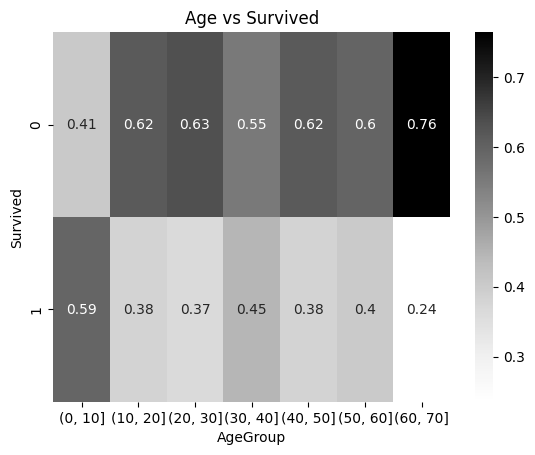

In [ ]:
contingency_tbl = pd.crosstab(train_v.Survived, train_v.AgeGroup) # let`s observe the relation between age and survived with probability table
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True,center=0.5, cmap="Greys")
plt.title("Age vs Survived")
plt.show()

Let`s dive into getting insights from SibSp and Parch attribute

In [ ]:
train_df.SibSp.value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
train_df.Parch.value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


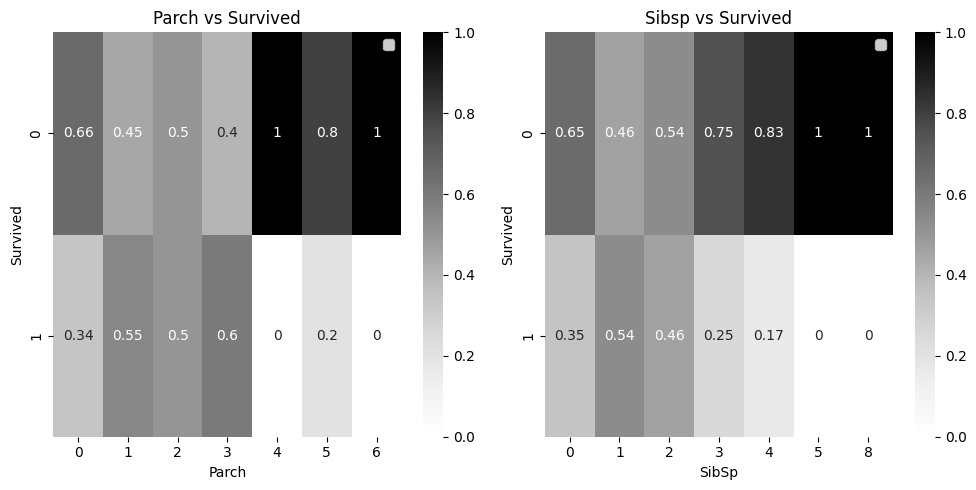

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Subplot 1: Pclass vs Survived
contingency_tbl = pd.crosstab(train_v.Survived, train_v.Parch)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True,center=0.5, cmap="Greys", ax=axes[0])
axes[0].legend()
axes[0].set_title("Parch vs Survived")

# Subplot 2: Sex vs Survived
contingency_tbl = pd.crosstab(train_v.Survived, train_v.SibSp)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True,center=0.5, cmap="Greys", ax=axes[1])
axes[1].legend()
axes[1].set_title("Sibsp vs Survived")

plt.tight_layout()
plt.show()

First thing that I`ve noticed is that two graphs look pretty much the same. In addition, there is some kind of relationship between Parch and Survived as weel as SibSp and Survived

In [ ]:
train_v["Parch_b"] = train_v.Parch != 0 #little experiment of feature engineering
train_v["SibSp_b"] = train_v.SibSp != 0

Text(0.5, 1.0, 'Sibsp vs Survived')

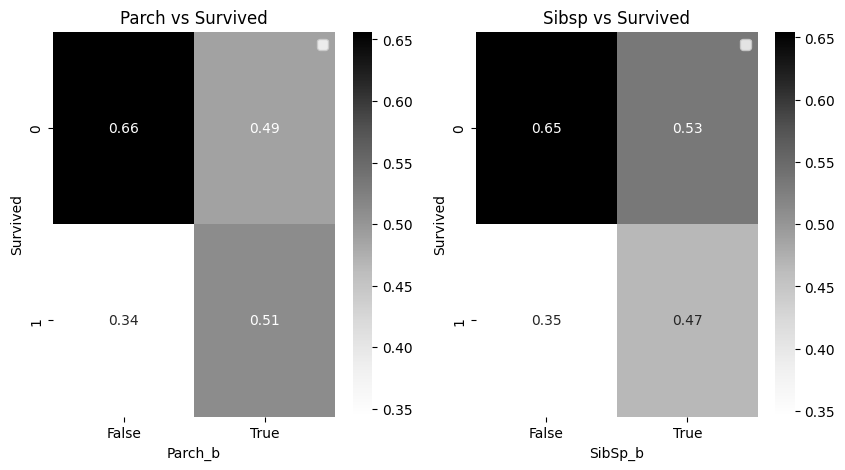

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Subplot 1: Pclass vs Survived
contingency_tbl = pd.crosstab(train_v.Survived, train_v.Parch_b)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True,center=0.5, cmap="Greys", ax=axes[0])
axes[0].legend()
axes[0].set_title("Parch vs Survived")

# Subplot 2: Sex vs Survived
contingency_tbl = pd.crosstab(train_v.Survived, train_v.SibSp_b)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True,center=0.5, cmap="Greys", ax=axes[1])
axes[1].legend()
axes[1].set_title("Sibsp vs Survived")

Maybe, we can use these tweo feature connected with Parch and SibSp to train the ml model

Analysing Fare attribute

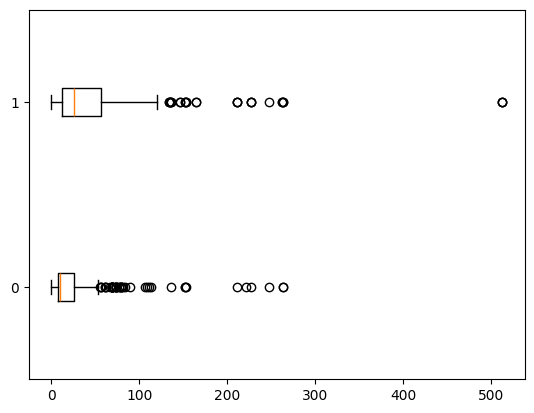

In [ ]:
surv_possibilities = train_df.Survived.unique()
DataForBox = {}
for poss in surv_possibilities:
 BM = train_df.Survived == poss
 DataForBox[poss] = train_df[BM]["Fare"]

plt.boxplot(DataForBox.values(),vert=False)
plt.yticks([1,2],surv_possibilities)
plt.show()

There is some relation between fare and survived

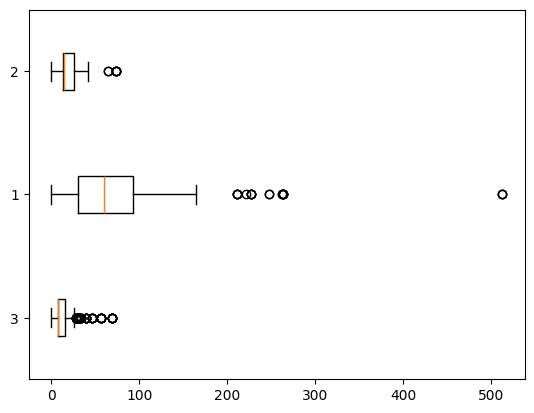

In [ ]:
class_possibilities = train_df.Pclass.unique()
DataForBox = {}
for poss in class_possibilities:
 BM = train_df.Pclass == poss
 DataForBox[poss] = train_df[BM]["Fare"]

plt.boxplot(DataForBox.values(),vert=False)
plt.yticks([1,2,3],class_possibilities)
plt.show()

There are some bivariate outliers

#Data preprocessing

###Understanding tasks

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split
#importing necessary libraries

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So we need to deal with nan values and decide which feature will be used for training

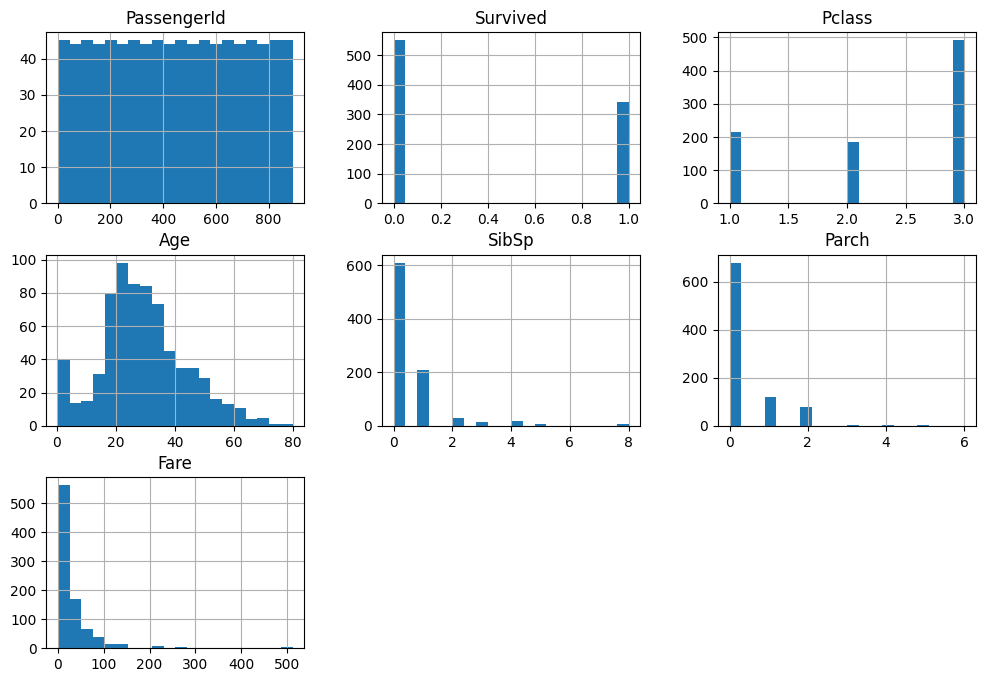

In [ ]:
train_df.hist(bins=20,figsize=(12,8))
plt.show()

So age attribute distribution has two peaks at ~28 years and ~5 years. I will use rbf_kernel to try to make the distribution roughly symmetrical. For Fare att i`ll try log transformation as well as raising to a power between 0 and 1

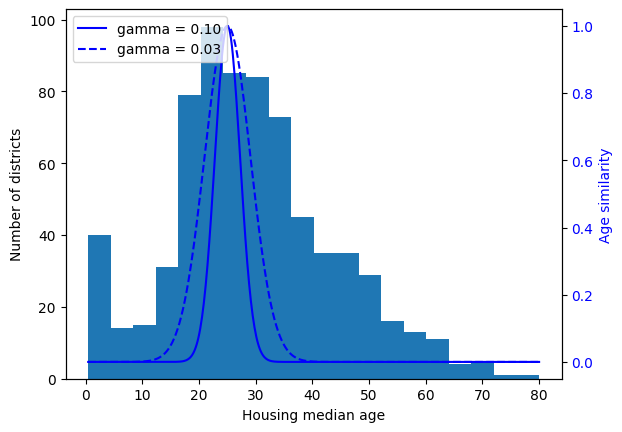

In [ ]:
ages = np.linspace(train_df["Age"].min(),
                   train_df["Age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[25]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[25]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(train_df["Age"], bins=20)

ax2 = ax1.twinx()
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

Looks good

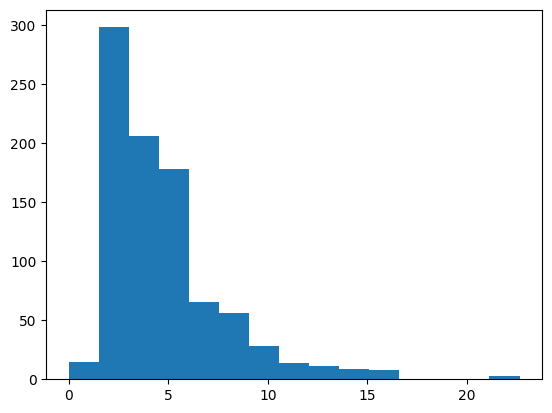

In [ ]:
plt.hist(train_df.Fare**0.5, bins=15)
plt.show()

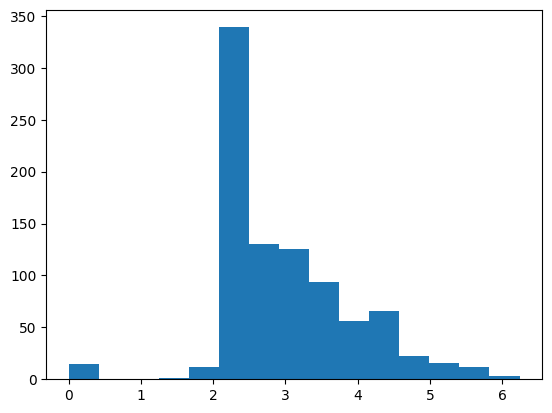

In [ ]:
plt.hist(np.log1p(train_df.Fare), bins=15)
plt.show()

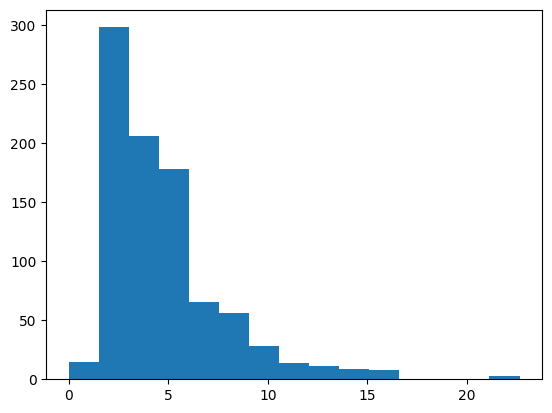

In [ ]:
plt.hist(np.sqrt(train_df.Fare), bins=15)
plt.show()

I deicde to go with raising to a power of 0.5

###Creating pipeline

In [ ]:

def deal_with_num_out(X): #first of all, I create my own transformer to deal with outliers
  Q1 = np.percentile(X, 25)
  Q3 = np.percentile(X, 75)
  IQR = Q3 - Q1
  lower_cap = Q1 - IQR * 1.5
  upper_cap = Q3 + IQR * 1.5
  X = np.where(X < lower_cap, lower_cap, X)
  X = np.where(X > upper_cap, upper_cap, X)
  return X
def deal_with_num_out_names(function_transformer,input_features):
  return input_features
out_del = FunctionTransformer(func=deal_with_num_out, feature_names_out=deal_with_num_out_names) #

def power(X): #raising to a power
  return X**0.5
def power_names(function_transformer,input_feature):
  return input_feature
power_raising = FunctionTransformer(power, feature_names_out=power_names)

def drop_add_columns(X):
  X["Parch_b"] = X["Parch"] != 0
  X["SibSp_b"] = X["SibSp"] != 0
  return X.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]) #Dropping unneeded columns

In [ ]:
age_pipeline = make_pipeline( #Pipeline for Age attribute
    SimpleImputer(strategy="median"), #filling missing values
    out_del, #deleting outleirs
    FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[25.]], gamma=0.03), feature_names_out= deal_with_num_out_names), #transformation
    StandardScaler() #scaling
)
fare_pipeline = make_pipeline( #Pipeline for Fare
    SimpleImputer(strategy="median"),
    out_del,
    power_raising,
    StandardScaler()
)

cat_pipeline = make_pipeline( #Pipeline for all categorical attributes
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


preprocessing = ColumnTransformer([ #Packing all pipelines together
        ("age", age_pipeline, ["Age"]),
        ("fare", fare_pipeline, ["Fare"]),
        ("impute", SimpleImputer(strategy="most_frequent"), ["Pclass", "SibSp", "Parch"])
    ],remainder=cat_pipeline)


In [ ]:
X_train = train_df.drop(columns=["Survived"]) #Creating X_train and y_train
y_train = train_df.Survived

In [ ]:
preprocessed = preprocessing.fit_transform(drop_add_columns(X_train))

In [ ]:
preprocessed.shape

(891, 14)

# Model selection

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier #importing necessary libraries

###RandomForestClassifier

Firstly, RandomForestClassifier with some hyperparameters tuning

In [ ]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state=42)),
])
param_grid = [
    {'random_forest__max_depth': [3,5,8],
     'random_forest__n_estimators':[100, 500, 1000,2000],
     'random_forest__min_samples_split':[2,4],
     'random_forest__max_features':["sqrt", 4,6]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=2,
                           scoring='accuracy')
grid_search.fit(drop_add_columns(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='most_frequent')),
                                                                                    ('onehotencoder',
                                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer-1',
                                                                                          FunctionTransfo...
                                                                         ['Fare']),
                                                                        ('impute',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['Pclass',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('random_forest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'random_forest__max_depth': [3, 5, 8],
                          'random_forest__max_features': ['sqrt', 4, 6],
                          'random_forest__min_samples_split': [2, 4],
                          'random_forest__n_estimators': [100, 500, 1000,
                                                          2000]}],
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.7946213533531516

In [ ]:
grid_search.best_params_

{'random_forest__max_depth': 8,
 'random_forest__max_features': 4,
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 2000}

Let`s get some insights on how which of the attribute is important for making prediction

In [ ]:
best_model = grid_search.best_estimator_
feature_imp = best_model["random_forest"].feature_importances_
pd.Series(feature_imp, index=preprocessing.get_feature_names_out()).sort_values()

,0
remainder__Embarked_Q,0.009454
remainder__SibSp_b_False,0.010195
remainder__SibSp_b_True,0.010500
remainder__Parch_b_True,0.013490
remainder__Parch_b_False,0.013865
remainder__Embarked_C,0.016734
remainder__Embarked_S,0.017980
impute__Parch,0.032280
impute__SibSp,0.040070
impute__Pclass,0.111586


Seems that sex, age and fare are our favorites

###Support Vector Classifier

In [ ]:
from scipy.stats import uniform
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("SVC", SVC(random_state=42)),
])
param_distribs = {'SVC__C': uniform(1,4),
                  'SVC__kernel':['linear']}
rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=100, cv=2,
    scoring='accuracy', random_state=42)
rnd_search.fit(drop_add_columns(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                          ('onehotencoder',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                transformers=[('age',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer-1',
                                                                                                FunctionT...
                                                                                                                    func=<function power at 0x799a37c4d7e0>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Fare']),
                                                                              ('impute',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               ['Pclass',
                                                                                'SibSp',
                                                                                'Parch'])])),
                                             ('SVC', SVC(random_state=42))]),
                   n_iter=100,
                   param_distributions={'SVC__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x799a396f0bb0>,
                                        'SVC__kernel': ['linear']},
                   random_state=42, scoring='accuracy')

In [ ]:
rnd_search.best_score_

0.7788960548193682

In [ ]:
rnd_search.best_params_

{'SVC__C': 2.49816047538945, 'SVC__kernel': 'linear'}

###K Neighbors Classifier

In [ ]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("KNC", KNeighborsClassifier()),
])
param_grid =  {'KNC__n_neighbors': [3,4,5,6,8],
              'KNC__weights':["uniform", "distance"],}

grid_search1 = GridSearchCV(full_pipeline, param_grid, cv=2,
                           scoring='accuracy')
grid_search1.fit(drop_add_columns(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='most_frequent')),
                                                                                    ('onehotencoder',
                                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer-1',
                                                                                          FunctionTransfo...
                                                                                          FunctionTransformer(feature_names_out=<function power_names at 0x799a37c4d3f0>,
                                                                                                              func=<function power at 0x799a37c4d7e0>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Fare']),
                                                                        ('impute',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['Pclass',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('KNC', KNeighborsClassifier())]),
             param_grid={'KNC__n_neighbors': [3, 4, 5, 6, 8],
                         'KNC__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search1.best_score_

0.7710535597319494

In [ ]:
grid_search1.best_params_

{'KNC__n_neighbors': 5, 'KNC__weights': 'uniform'}

###Logistic Regression

In [ ]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("LR", LogisticRegression(random_state=42)),
])
param_grid =  {'LR__penalty': ["l1", "l2", "elasticnet", None]}

grid_search2 = GridSearchCV(full_pipeline, param_grid, cv=2,
                           scoring='accuracy')
grid_search2.fit(drop_add_columns(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 660, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='most_frequent')),
                                                                                    ('onehotencoder',
                                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer-1',
                                                                                          FunctionTransfo...
                                                                                          FunctionTransformer(feature_names_out=<function power_names at 0x799a37c4d3f0>,
                                                                                                              func=<function power at 0x799a37c4d7e0>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Fare']),
                                                                        ('impute',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['Pclass',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('LR',
                                        LogisticRegression(random_state=42))]),
             param_grid={'LR__penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')

In [ ]:
grid_search2.best_score_

0.7643371794225828

In [ ]:
grid_search2.best_params_

{'LR__penalty': 'l2'}

##Stochatic Gradient Descent

In [ ]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("SGD", SGDClassifier(random_state=42)),
])
param_grid =  {'SGD__penalty': ["l1", "l2", "elasticnet", None],
               'SGD__alpha':[0.0001, 0.001, 0.01, 0.1],
               'SGD__learning_rate':["optimal", 0.04, 0.4]}

grid_search3 = GridSearchCV(full_pipeline, param_grid, cv=2,
                           scoring='accuracy')
grid_search3.fit(drop_add_columns(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
64 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 660, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='most_frequent')),
                                                                                    ('onehotencoder',
                                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer-1',
                                                                                          FunctionTransfo...
                                                                                                              func=<function power at 0x799a37c4d7e0>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Fare']),
                                                                        ('impute',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         ['Pclass',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('SGD',
                                        SGDClassifier(random_state=42))]),
             param_grid={'SGD__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'SGD__learning_rate': ['optimal', 0.04, 0.4],
                         'SGD__penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')

In [ ]:
grid_search3.best_score_

0.7867385499067869

#Model Fine-Tuning

Best result was given by RandomForestClassifier so I`ve decided to go with it and try to do some hyperparameters tuning as well as feature engineering to get better accuracy

In [ ]:
best_model = grid_search.best_estimator_
feature_imp = best_model["random_forest"].feature_importances_
pd.Series(feature_imp, index=preprocessing.get_feature_names_out()).sort_values()

,0
remainder__Embarked_Q,0.009454
remainder__SibSp_b_False,0.010195
remainder__SibSp_b_True,0.010500
remainder__Parch_b_True,0.013490
remainder__Parch_b_False,0.013865
remainder__Embarked_C,0.016734
remainder__Embarked_S,0.017980
impute__Parch,0.032280
impute__SibSp,0.040070
impute__Pclass,0.111586


In [ ]:
preprocessed_df = pd.DataFrame(preprocessing.fit_transform(drop_add_columns(X_train)), columns=preprocessing.get_feature_names_out(), index= train_df.index) #Let`s look at out preprocessed training set

In [ ]:
preprocessed_df.shape

(891, 14)

In [ ]:
preprocessed_df.head()

,age__Age,fare__Fare,impute__Pclass,impute__SibSp,impute__Parch,remainder__Sex_female,remainder__Sex_male,remainder__Embarked_C,remainder__Embarked_Q,remainder__Embarked_S,remainder__Parch_b_False,remainder__Parch_b_True,remainder__SibSp_b_False,remainder__SibSp_b_True
0,0.980648,-0.904305,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-1.075168,1.824259,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.542913,-0.842482,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.957036,1.413364,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.957036,-0.831326,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


I want to create new attribute AgeGroup where I divide passengers into age groups

In [ ]:
bins = np.arange(0,80, 10)
preprocessed_df["AgeGroup"] = pd.cut(train_df["Age"].fillna(train_df.Age.mean()), bins, labels=[1,2,3,4,5,6,7])

In [ ]:
preprocessed_df.head()

,age__Age,fare__Fare,impute__Pclass,impute__SibSp,impute__Parch,remainder__Sex_female,remainder__Sex_male,remainder__Embarked_C,remainder__Embarked_Q,remainder__Embarked_S,remainder__Parch_b_False,remainder__Parch_b_True,remainder__SibSp_b_False,remainder__SibSp_b_True,AgeGroup
0,0.980648,-0.904305,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3
1,-1.075168,1.824259,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4
2,1.542913,-0.842482,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3
3,-0.957036,1.413364,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4
4,-0.957036,-0.831326,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4


In [ ]:
grid_search.best_params_ #

{'random_forest__max_depth': 8,
 'random_forest__max_features': 4,
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 2000}

In [ ]:
param_grid = [
    {'max_depth': [5,8,10],
     'n_estimators':[100,2000,3000],
     'min_samples_split':[2,3],
     'max_features':[2,4,6]},
]
RFC = RandomForestClassifier(random_state=42)
grid_search_new = GridSearchCV(RFC, param_grid, cv=2, scoring='accuracy')
grid_search_new.fit(preprocessed_df, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [5, 8, 10], 'max_features': [2, 4, 6],
                          'min_samples_split': [2, 3],
                          'n_estimators': [100, 2000, 3000]}],
             scoring='accuracy')

In [ ]:
grid_search_new.best_score_

0.8148158411850658

Our accuracy is actually higher!

In [ ]:
grid_search_new.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_split': 3,
 'n_estimators': 2000}

In [ ]:
best_model = grid_search_new.best_estimator_
feature_imp = best_model.feature_importances_
pd.Series(feature_imp, index=preprocessed_df.columns).sort_values()

,0
remainder__Embarked_Q,0.009180
remainder__SibSp_b_False,0.009934
remainder__SibSp_b_True,0.009983
remainder__Parch_b_True,0.011236
remainder__Parch_b_False,0.011528
remainder__Embarked_S,0.016216
remainder__Embarked_C,0.016377
impute__Parch,0.025733
impute__SibSp,0.042543
AgeGroup,0.074844


So now I want to get rid off attributes which have near to no impact on making predictions

In [ ]:
preprocessed_df_new = preprocessed_df.drop(columns=["age__Age", "remainder__Embarked_Q", "remainder__SibSp_b_False", "remainder__SibSp_b_True", "remainder__Parch_b_True", "remainder__Parch_b_False", "remainder__Embarked_S", "remainder__Embarked_C"])
preprocessed_df_new["Sum"] = preprocessed_df_new["impute__Parch"]+preprocessed_df_new["impute__SibSp"] #Creating new attribute which is basically a sum of Parch and SibSp
param_grid =  {'max_depth': [3,4,5,8],
     'n_estimators':[100, 500, 1000,2000],
     'min_samples_split':[2,3,4],
     'max_features':["sqrt",4,6]}
RFC = RandomForestClassifier(random_state=42)
grid_search_new_2 = GridSearchCV(RFC, param_grid, cv=2, scoring='accuracy')
grid_search_new_2.fit(preprocessed_df_new, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 8],
                         'max_features': ['sqrt', 4, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='accuracy')

In [ ]:
grid_search_new_2.best_score_

0.8204262608958532

Even higher accuracy!

In [ ]:
best_model = grid_search_new_2.best_estimator_
feature_imp = best_model.feature_importances_
pd.Series(feature_imp, index=preprocessed_df_new.columns).sort_values()

,0
impute__Parch,0.007664
impute__SibSp,0.018387
AgeGroup,0.041709
Sum,0.054638
fare__Fare,0.087264
impute__Pclass,0.145010
remainder__Sex_female,0.319145
remainder__Sex_male,0.326183


In [ ]:
grid_search_new_2.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 500}

Another try:

In [ ]:
param_grid =  {'max_depth': [2,3,4],
     'n_estimators':[2000,3000],
     'min_samples_split':[2,3,4],
     'max_features':[2,3,4,6]}
RFC = RandomForestClassifier(random_state=42)
grid_search_new_3 = GridSearchCV(RFC, param_grid, cv=2, scoring='accuracy')
grid_search_new_3.fit(preprocessed_df_new, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
grid_search_new_3.best_score_

0.8204262608958532

In [ ]:
grid_search_new_3.best_params_

{'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 2000}

Additionaly, let`s also try to get ridd of Parch and SibSp attributes

In [ ]:
preprocessed_df_new_1 = preprocessed_df_new.drop(columns=["impute__Parch", "impute__SibSp"])
param_grid =  {'max_depth': [3,4],
     'n_estimators':[2000],
     'min_samples_split':[2,3],
     'max_features':[2,3,4,5]}
RFC = RandomForestClassifier(random_state=42)
grid_search_new_4 = GridSearchCV(RFC, param_grid, cv=2, scoring='accuracy')
grid_search_new_4.fit(preprocessed_df_new_1, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4], 'max_features': [2, 3, 4, 5],
                         'min_samples_split': [2, 3], 'n_estimators': [2000]},
             scoring='accuracy')

In [ ]:
grid_search_new_4.best_score_

0.815946994507986

Lower accuracy than the previous model and set

#Correcting Pipeline

So we have found out that we actually can get rid of some attributes

In [ ]:
def drop_add_columns_new(X):
  bins = np.arange(0,80, 10)
  X["AgeGroup"] = pd.cut(train_df["Age"].fillna(train_df.Age.mean()), bins, labels=[1,2,3,4,5,6,7])
  X["Sum"] = X["SibSp"] + X["Parch"]
  return X.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Age"])

preprocessing_new = ColumnTransformer([("fare", fare_pipeline, ["Fare"]),
                                   ("impute", SimpleImputer(strategy="most_frequent"), ["Pclass", "SibSp", "Parch"]),
                                   ("gender", cat_pipeline, ["Sex"])])


#Final Model Submission

Final steps

In [ ]:
preprocessed_df_new = preprocessing_new.fit_transform(drop_add_columns_new(X_train))
final_model = grid_search_new_2.best_estimator_
final_model.fit(preprocessed_df_new, y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=2000,
                       random_state=42)

In [ ]:
X_test = pd.read_csv("test_t.csv")
preprocessed_test = pd.DataFrame(preprocessing_new.transform(drop_add_columns(X_test)), columns=preprocessing_new.get_feature_names_out(), index= X_test.index)

In [ ]:
predictions = final_model.predict(preprocessed_test)
submissions= pd.DataFrame({"PassengerId":X_test["PassengerId"], "Survived":predictions}, index= X_test.index)
submissions.to_csv("submissions_titanic.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


We got 78,2% accuracy on test set so there is still a room for improvement